### XGboost_고객 이탈

In [1]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

In [3]:
import pandas as pd

df = pd.read_csv("bank.csv")

In [4]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

mpl.rc('font', family='NanumGothic') # 폰트 설정
mpl.rc('axes', unicode_minus=False) # 유니코드에서 음수 부호 설정

# 차트 스타일 설정
sns.set(font="NanumGothic", rc={"axes.unicode_minus":False}, style='darkgrid')
plt.rc("figure", figsize=(10,8))

warnings.filterwarnings("ignore")

In [5]:
import pandas as pd

# CSV 파일을 읽어서 DataFrame으로 저장
df = pd.read_csv("bank.csv")

# 데이터셋 확인
print(df.head())

   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  Complain  Satisfaction Score Card Type  \
0        101348.88       1         1                   2   DIAMOND   
1        112542.58

In [6]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339


In [7]:
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

In [8]:
print(df.columns)

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited', 'Complain', 'Satisfaction Score', 'Card Type',
       'Point Earned'],
      dtype='object')


In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split

# 데이터프레임을 복사
dataset = df.copy()

# 두 열을 리스트로 묶어 선택
X_features = dataset[['CreditScore', 'Age']]  # 올바르게 두 열을 선택
y_label = dataset['Exited']  # 타겟 열 선택

# 'feature_names' 대신 'columns' 사용
cancer_df = pd.DataFrame(data=X_features, columns=X_features.columns)  # X_features의 열 이름을 사용
cancer_df["target"] = y_label  # 타겟 추가

# 데이터프레임 확인
print(cancer_df.head())

   CreditScore  Age  target
0          619   42       1
1          608   41       0
2          502   42       1
3          699   39       0
4          850   43       0


In [13]:
print(dataset['Exited'].value_counts())

Exited
0    7962
1    2038
Name: count, dtype: int64


해설 = 타겟 레이블 값은 일탈X 0값으로 7962개, 일탈 1값으로 2038개가 있다

In [14]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_features, y_label, test_size=0.2, random_state=156)

dtrain = xgb.DMatrix(data = X_train, label = y_train)
dtest = xgb.DMatrix(data = X_test, label = y_test)

## 하이퍼 파라미터 설정

In [18]:
params = {
    "max_depth": 3, 
    "eta": 0.1, 
    "objective": "binary:logistic", 
    "eval_metric": "logloss"
    # "early_stoppings": 100 
}

num_rounds = 400 # 부스팅 반복 횟수
# early_stoppings를 적용해도 후의 명령어에서 사용되지 않는다는 메시지가 출력되어 제거

# 수행된다는 가정하에 조기 중단을 수행하려면 eval_set과 eval_metric이 함께 설정

# eval_set은 성능 평가를 수행할 test 데이터를 설정하며 eval_metric은 성능 평가 함수를 지정

## XGB 학습

In [17]:
# evals 파라미터에 train, test 셋을 명기하면 평가를 진행하면서 조기 중단을 적용 할 수 있다.
wlist = [(dtrain, "train"), (dtest, "eval")]

# 모델 학습: 사이킷런과 달리 train() 함수에 파라미터를 전달한다.
xgb_model = xgb.train(params = params, dtrain = dtrain, num_boost_round = num_rounds,
                      evals = wlist)

[0]	train-logloss:0.49233	eval-logloss:0.50526
[1]	train-logloss:0.48207	eval-logloss:0.49381
[2]	train-logloss:0.47378	eval-logloss:0.48454
[3]	train-logloss:0.46701	eval-logloss:0.47666
[4]	train-logloss:0.46141	eval-logloss:0.47031
[5]	train-logloss:0.45679	eval-logloss:0.46475
[6]	train-logloss:0.45292	eval-logloss:0.46012
[7]	train-logloss:0.44972	eval-logloss:0.45613
[8]	train-logloss:0.44706	eval-logloss:0.45290
[9]	train-logloss:0.44483	eval-logloss:0.45038
[10]	train-logloss:0.44284	eval-logloss:0.44784
[11]	train-logloss:0.44114	eval-logloss:0.44568
[12]	train-logloss:0.43974	eval-logloss:0.44388
[13]	train-logloss:0.43856	eval-logloss:0.44238
[14]	train-logloss:0.43751	eval-logloss:0.44100
[15]	train-logloss:0.43659	eval-logloss:0.43994
[16]	train-logloss:0.43581	eval-logloss:0.43893
[17]	train-logloss:0.43517	eval-logloss:0.43820
[18]	train-logloss:0.43459	eval-logloss:0.43746
[19]	train-logloss:0.43407	eval-logloss:0.43686
[20]	train-logloss:0.43359	eval-logloss:0.43663
[2

## XGB 예측

In [19]:
# 예측 확률
pred_probs = xgb_model.predict(dtest)
print("predict() 수행 결과값 10개만 표시")
print(np.round(pred_probs[:10], 3))

# 예측 분류
preds = [1 if x > 0.5 else 0 for x in pred_probs]
print("예측 분류 10개만 표시")
print(f"{preds[:10]}")

predict() 수행 결과값 10개만 표시
[0.2   0.07  0.573 0.43  0.089 0.02  0.104 0.12  0.543 0.073]
예측 분류 10개만 표시
[0, 0, 1, 0, 0, 0, 0, 0, 1, 0]


## XGB 평가

In [20]:
# 3장에서 사용한 성능 평가 함수
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import f1_score, roc_auc_score

def get_clf_eval(y_test, pred=None, pred_proba_po=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    auc = roc_auc_score(y_test, pred_proba_po)
   
    print("오차 행렬")
    print(confusion)
    print(f"정확도: {accuracy:.4f}, 정밀도: {precision:.4f}, 재현율: {recall:.4f}, F1: {f1:.4f}, AUC: {auc:.4f}")

In [21]:
get_clf_eval(y_test, pred = preds, pred_proba_po = pred_probs)

오차 행렬
[[1492   81]
 [ 331   96]]
정확도: 0.7940, 정밀도: 0.5424, 재현율: 0.2248, F1: 0.3179, AUC: 0.7576


## XGB 피처별 중요도

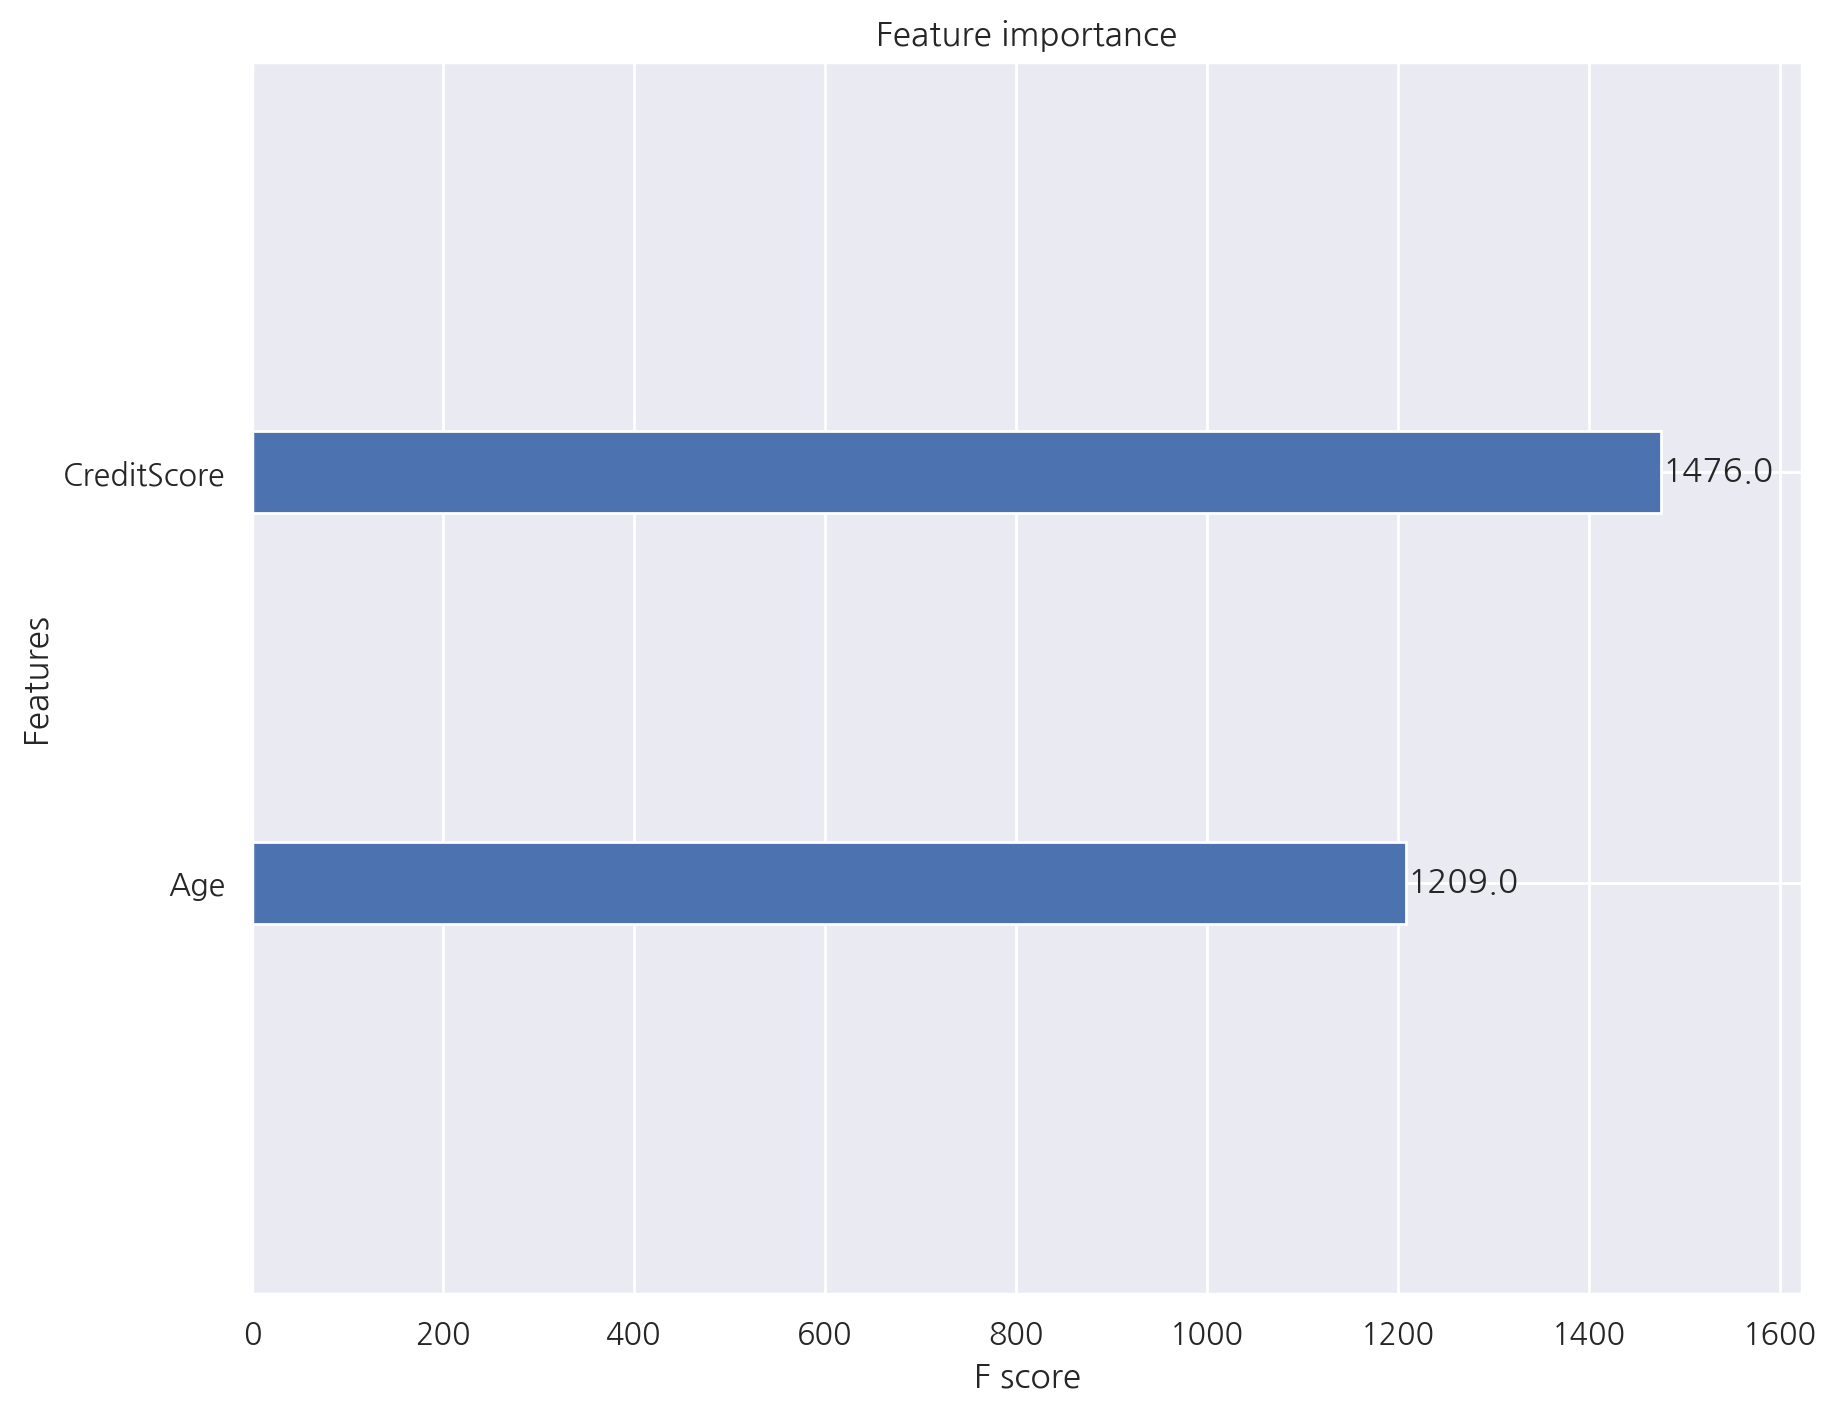

In [22]:
from xgboost import plot_importance

plot_importance(xgb_model)
plt.show()

## XGB 시각화

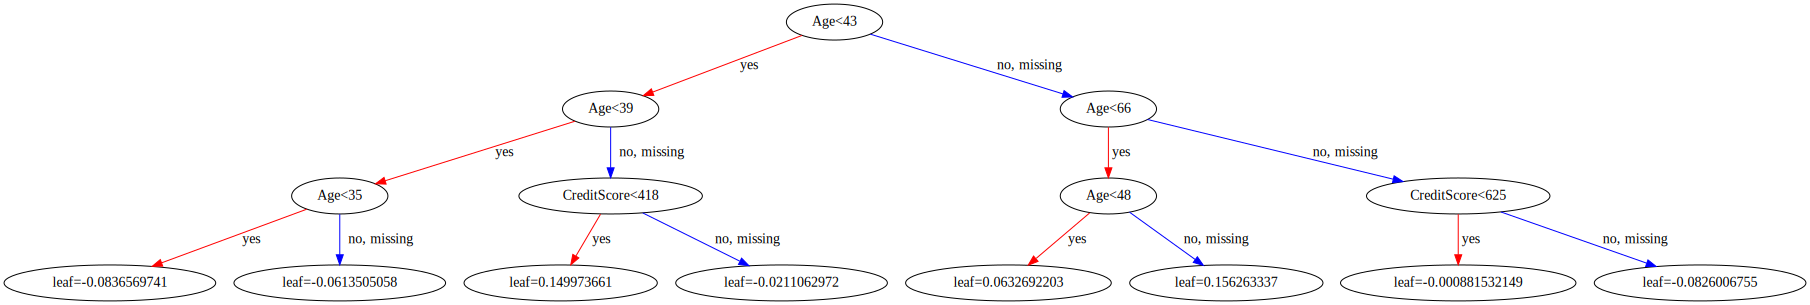

In [23]:
from xgboost import to_graphviz
import graphviz

to_graphviz(xgb_model)

In [25]:
import pickle
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

# 예시로 XGBClassifier와 RandomizedSearchCV 사용
xgb_model = XGBClassifier()

# 파라미터 그리드 정의 (예시)
param_dist = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

# RandomizedSearchCV 정의
rscv = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_dist, n_iter=10, random_state=42)

# 모델 학습
rscv.fit(X_train, y_train)

# 모델을 pickle로 저장
with open('xgb_model.pkl', 'wb') as f:
    pickle.dump(rscv, f)  # rscv가 정의된 변수명을 사용

In [26]:
import pickle
with open('xgb_model.pkl', 'wb') as f:
    pickle.dump(rscv, f)

In [27]:
pwd

'/home/encore/workspace'